In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf

from model import ImageCaptionModel
from decoder import TransformerDecoder, RNNDecoder

2024-05-04 16:38:14.795679: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
!python preprocessing.py

2024-05-04 02:01:34.066622: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Getting training embeddings
2024-05-04 02:02:04.833406: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[(240/240)] Processing '../memes900k/images/i-will-find-you-meme.jpg' into 2048-

Getting testing embeddings
[(60/60)] Processing '../memes900k/images/trologirl.jpg' into 2048-D Inception V

Data has been dumped into ../memes900k/data.p!


### Check metadata of the input

In [3]:
## Before this, download the dataset and run preprocessing.py as instructed. 
## This may take like 10 mins, but should only happen once so ok.
## https://www.kaggle.com/datasets/adityajn105/flickr8k?resource=download

with open('../memes900k/data.p', 'rb') as data_file:
    data_dict = pickle.load(data_file)

# As mentioned in the handout, this assignment has 5 captions per image. This block of code 
# expands the image_feature lists to have 5 copies of each image to correspond to each of their captions 
feat_prep = lambda x: np.repeat(np.array(x).reshape(-1, 2048), 100, axis=0)
img_prep  = lambda x: np.repeat(x, 100, axis=0)

## Captions; preprocessed sentences with 20 window size
train_captions  = np.array(data_dict['train_captions']);            print('train_captions:  ', train_captions.shape)
test_captions   = np.array(data_dict['test_captions']);             print('test_captions:   ', test_captions.shape)

## 2048-D resnet embeddings of images.
train_img_feats = feat_prep(data_dict['train_image_features']);     print('\ntrain_img_feats: ', train_img_feats.shape)
test_img_feats  = feat_prep(data_dict['test_image_features']);      print('test_img_feats:  ', test_img_feats.shape)

## Small subset of actual images for visualization purposes. 
## These are just for the first 100 images of each (clones 5 times)
train_images    = img_prep(data_dict['train_images']);              print('\ntrain_images:    ', train_images.shape)
test_images     = img_prep(data_dict['test_images']);               print('test_images:     ', test_images.shape)

## Conversion dictionaries to go between word and label index
word2idx        = data_dict['word2idx']
idx2word        = data_dict['idx2word']

train_captions:   (24000, 21)
test_captions:    (6000, 21)

train_img_feats:  (24000, 2048)
test_img_feats:   (6000, 2048)

train_images:     (24000, 299, 299, 3)
test_images:      (6000, 299, 299, 3)


### Running your RNN model

Depending on your use cases, you may choose to structure your model in a variety of ways. In contrast to previous assignments, this one is intended to mimic a lot of modern research-oriented repositories you might find in the wild. Specifically: **Instead of providing easy-to-use APIs for experimenters, they rigidify their implementation to make tests replicable.** Specifically, they may provide a command-line interface and define testing/training procedures which log results. 

(I mean, ideally you can make a flexible API and allow for both ease of extension and examples to demonstrate how your results were gathered, but sometimes researchers only have so much time...)

Once you have filled in the `model.py` components and the `RNNDecoder` of the `decoder.py` file, run this block to train your RNN model. As you can see, the hyperparamets default to the ones you use in `assignment.py`'s argparse specification, but feel free to change any of them to try to improve your model. 




### Running your Transformer model

In [6]:
## TODO: Increase epochs to a larger size when ready (maybe 2 or 3 would be enough?)
!python main.py --type transformer --task train --data ../memes900k/data.p --epochs 10 --lr 0.0005 --chkpt_path ../transform_model

2024-05-04 16:45:43.315490: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Found 400000 word vectors.
2024-05-04 16:46:11.291606: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Converted 15020 words (1532 misses)
24000 24000
[epoch 0]	 avg_prp:307.47009148761924	 avg_acc:0.21339236199855804
24000 24000
[epoch 1]	 avg_prp:216.49135197558797	 avg_acc:0.23681005835533142
24000 24000
[epoch 2]	 avg_prp:194.980328504551	 avg_acc:0.24869170784950256
24000 24000
[epoch

## Visualization

After training our Transformer model, you can visualize the self-attention layer to examine the behavior of your attention heads and see if any patterns emerge. 

To test out the components of the model interactively, you'll need to deconstruct selections of the model/runner code and get an instance of the model in an interactive context (aka inside the notebook). 



In [7]:
## Feel free to insert auto-reloads as necessary
from main import parse_args, load_model
from decoder import TransformerDecoder, RNNDecoder

## Pull your model into the notebook. This is heavily based off of assignment.py, 
## and feel free to reuse as much as you want. Your final project will probably 
## involve a lot of this investigative reverse-engineering based on what repos 
## you have to stumble upon.
## You're not in a notebook scenario, so use get_default_arguments and feel free to update it...

args = parse_args('--type rnn --task both --data ../memes900k/data.p'.split())

args.chkpt_path = '../transform_model'
tra_imcap = load_model(args)

2024-05-04 17:25:52.488656: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model loaded from '../transform_model'


In [8]:
tra_imcap.summary()

Model: "image_caption_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer_decoder (Transf  multiple                 11373952  
 ormerDecoder)                                                   
                                                                 
Total params: 11,373,952
Trainable params: 11,373,952
Non-trainable params: 0
_________________________________________________________________


### Caption Generation

 



There is still one piece of this equation missing. The tokens are sampled from the probabilities your models generate, but your models were required to output logits, not probabilities. This is becasue this assignment, like many NLP models, uses temperature as a parameter in text generation. If the models sampled from  probabilies calculated by simply applying softmax to the logits, then the probability of the most likely word will usually be very high and the models will usually genrate the same, most probable caption every time. We use the temperature as a parameter to even out the probabilites so the model produces more 'creative' captions. This is done by dividing the logits by the temperature parameter before applying softmax. Higher temprature values will give a more creative captiong, while temprature values closer to 0 will be more greedy. Check out [this](https://lukesalamone.github.io/posts/what-is-temperature/) article for a demonstration and further explaination of temprature in NLP models.


In [9]:
def gen_caption_temperature(model, image_embedding, wordToIds, padID, temp, window_length):
    """
    Function used to generate a caption using an ImageCaptionModel given
    an image embedding.
    """
    idsToWords = {id: word for word, id in wordToIds.items()}
    unk_token = wordToIds['<unk>']
    caption_so_far = [wordToIds['<start>']]
    while len(caption_so_far) < window_length and caption_so_far[-1] != wordToIds['<end>']:
        caption_input = np.array([caption_so_far + ((window_length - len(caption_so_far)) * [padID])])
        logits = model(np.expand_dims(image_embedding, 0), caption_input)
        logits = logits[0][len(caption_so_far) - 1]
        probs = tf.nn.softmax(logits / temp).numpy()
        next_token = unk_token
        attempts = 0
        while next_token == unk_token and attempts < 5:
            next_token = np.random.choice(len(probs), p=probs)
            attempts += 1
        caption_so_far.append(next_token)
    out = []
    for x in caption_so_far:
      word = idsToWords[x]
      if word == "sep":
        word = "<newline>"
      elif word == "emp":
        continue
      out.append(word)
    return ' '.join(out[1:-1])
    # return ' '.join([idsToWords[x] for x in caption_so_far][1:-1])

## generate captions on training set

C1: <unk> june sep ll play golf until then
C2: replication lag is going down sep so we got that going for us which is nice
C3: don think the heavy sep stuff is gonna come down for while
C4: so an extra thousand month sep for extra square feet
C5: atleast understand bootstrap better than doug sep so ve got that going for me which is nice
TRA: got rejected me <newline> but got that going for me which is nice


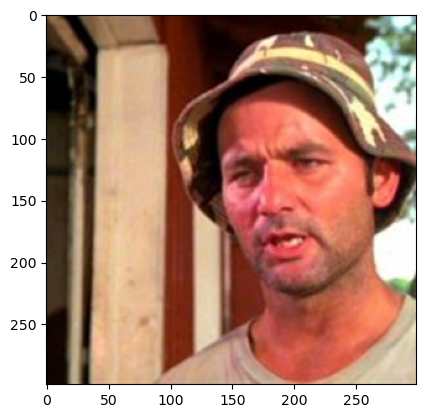

C1: sliding the ipad sep it not unlocking
C2: want to instal sep <unk> bay
C3: usb mic doesnt work sep format
C4: free smileys sep awesome
C5: all my bitches love me sep you ain fuckin with this ducky
TRA: can haz <newline> but can get rid of the thumbnail


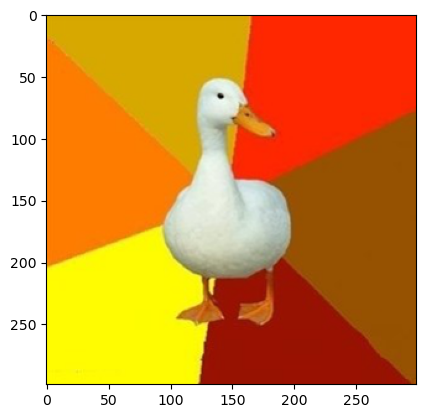

C1: <unk> enters mainstream sep time to play ssx on tour for gamecube
C2: listen nirvana sep when kurt was alive
C3: remembering christmas presents on time sep soo main stream
C4: halloween sep celebrated last week
C5: auction kings sep oh you mean bidder rivals
TRA: used emg <newline> before it was cool


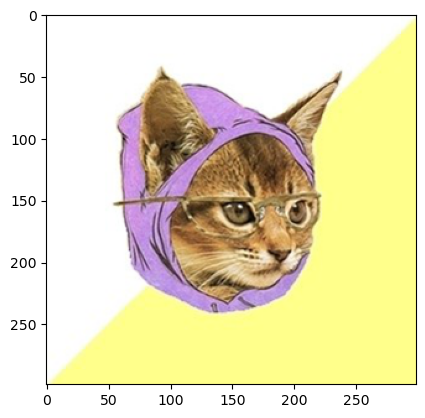

C1: nowadays diversity actually means sep every person except white people
C2: war veterans should not get sep discounts advantages celebration days or be honored in any way
C3: <unk> all lord of the rings movies today sep was pretty disappointed by them
C4: people who bitch about being forever alone sep don realise how good they ve got it
C5: steve jobs wasn mlk ghandi or einstein sep he shouldn treated as if he were like them
TRA: think dank <newline> is not hijacked


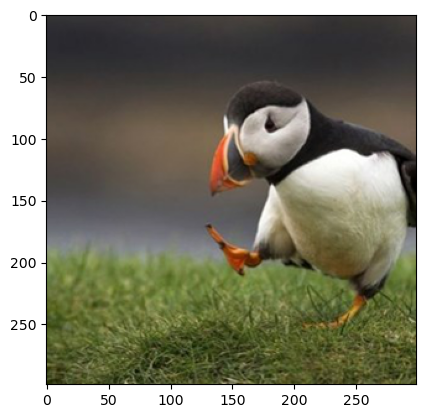

C1: where can one drop his fucking drawers sep around here
C2: <unk> the same spot sep over and over again
C3: chops wood for years sep killed by wolf
C4: <unk> has reached sep the faggot age
C5: <unk> sep words of holy man
TRA: <unk> <newline> no


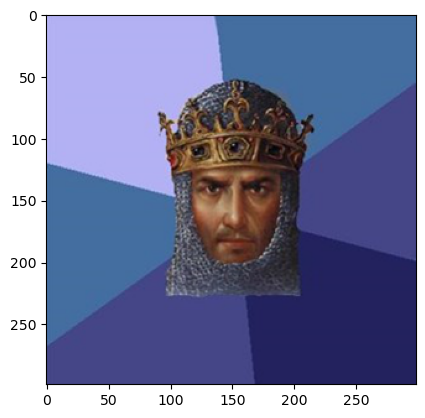

C1: millennials suck ass sep fuck millennials
C2: <unk> tracking santa sep is just way for kids to learn about countries
C3: the greatest songs on earth sep doesn have resolution on youtube
C4: emp sep wow cool
C5: is that my best friend sep with my gf in the corner dey
TRA: what if boobytrap <newline> underaged


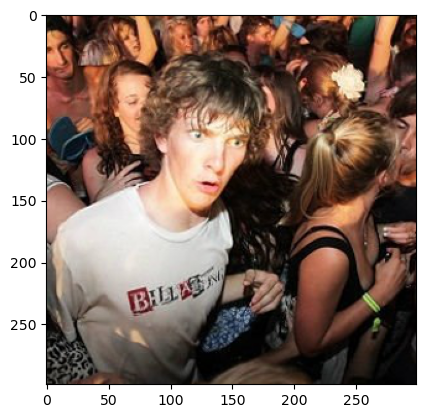

C1: <unk> sep no pass
C2: no sep text me
C3: no invite me to nyc <unk> sep so selfish
C4: hausarbeit sep suck
C5: kwan <unk> sep why so sohai
TRA: no <newline> no


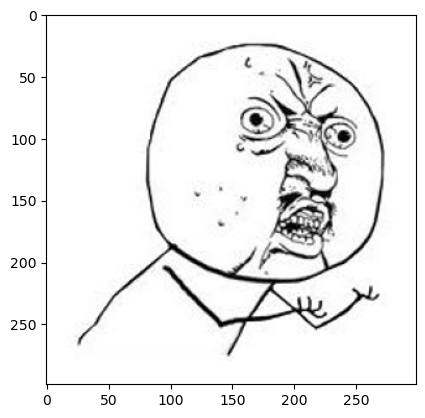

C1: check out my swa sep shuttup
C2: buon natal sep slap
C3: made ask fm sep shut the fuck up
C4: is the bes sep no
C5: emp sep <unk>
TRA: <unk> <newline>


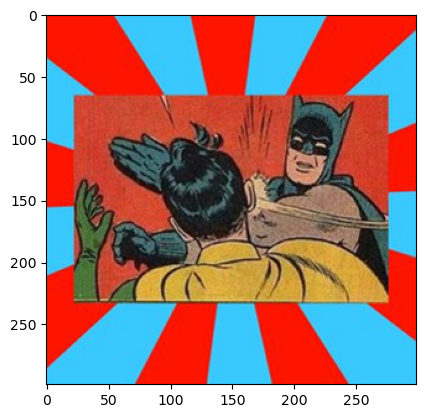

C1: dead in the water you keep using that term sep don think it means what you think it means
C2: highly edited sep you keep using that word do not think it means what you think it means
C3: low diversity you keep using those words sep don think they mean what you think they mean
C4: keep using those words bitch sep someone gona punch your face in soon enough
C5: escalation sep emp
TRA: you keep using that word <newline> don think it means what you think it means


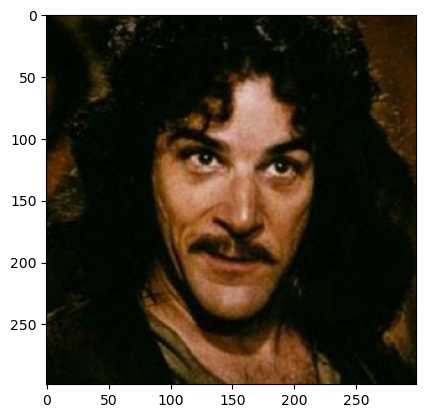

C1: mr obama bin laden ha <unk> sep emp
C2: fuck mate this sep shits good
C3: presidency just got whole sep lot more fun
C4: good shit sep where da white bitches at
C5: yes drink this sep yes bitch can this
TRA: <unk> <newline>


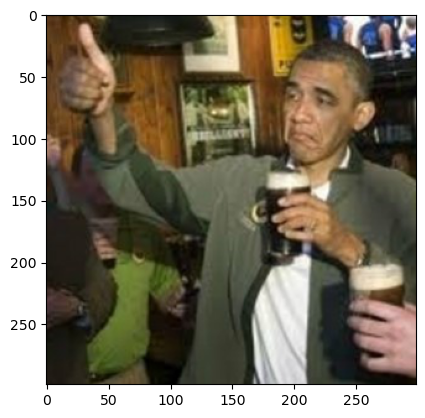

In [26]:
temperature = 0.05
indices = np.random.choice(np.array(list(range(0, 24000, 100))), 10, replace=False)
for i in indices:
    curr_image_feat = train_img_feats[i]
    curr_image      = train_images[i]
    for j in range(5):  ## Display all of the captions trained on
        words = [idx2word[x] for x in train_captions[i+j][:-1] if idx2word[x] not in ('<pad>', '<start>', '<end>')]
        print(f'C{j+1}:', ' '.join(words))
    print('TRA:', gen_caption_temperature(tra_imcap, curr_image_feat, word2idx, word2idx['<pad>'], temperature, args.window_size))
    plt.imshow(curr_image)
    plt.show()

## generate captions on test set

C1: recycle sep or will find you and will kill you
C2: dont what you are but will find you sep and download you
C3: don know who left the dishes on the sink sep but will find you and will kill you
C4: if you no swap fin sep will find you and will kill you
C5: if people treat me like this sep will find them and kill them
TRA: you re going to go to the world <newline> you re gonna have to have to have no


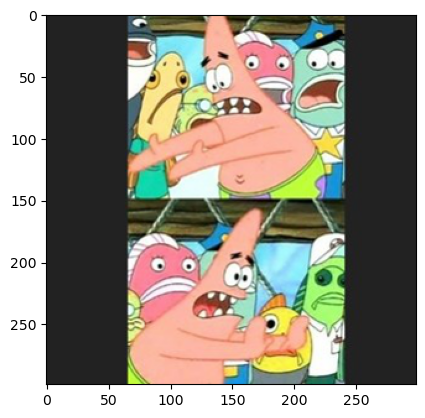

C1: what the sep oh yeah it me
C2: what did she say on my facbook sep ill kill that bitch
C3: what is sep goo gal
C4: no more energy sep am dead
C5: cyclists sep get off my lawn
TRA: <unk> <newline> no


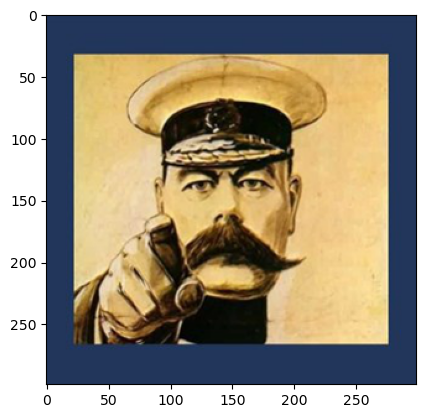

C1: get high sep friday
C2: hey going to get some beer what flavor do you want sep cucumber
C3: blaze before midterm sep
C4: watches porn sep thinks about bad acting
C5: what she order sep <unk> on the dollar menu
TRA: you want to tell me <newline>


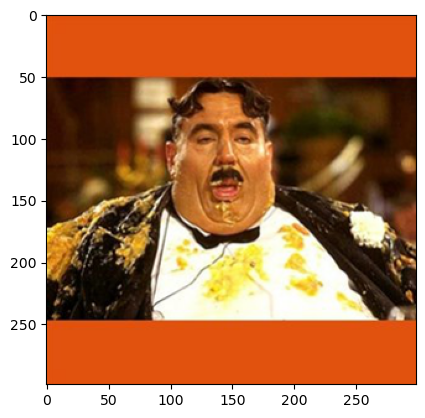

C1: sliding the ipad sep it not unlocking
C2: want to instal sep <unk> bay
C3: usb mic doesnt work sep format
C4: free smileys sep awesome
C5: all my bitches love me sep you ain fuckin with this ducky
TRA: you re not <newline> you


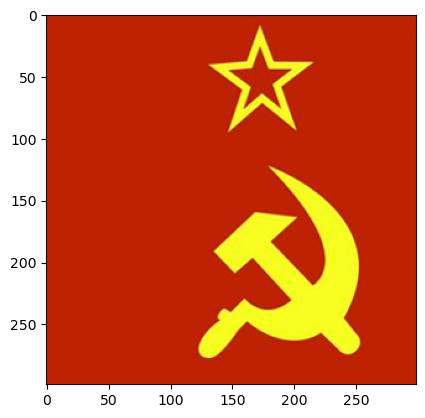

C1: this that sep or gtfo
C2: how will they know am first world sep if dont have mac
C3: what happens if activate all of the cheats sep oh shi
C4: mom post have you done your homework honey on my wall sep she must die
C5: but mom sep saving the princess is more important than homeworks
TRA: <newline> <unk>


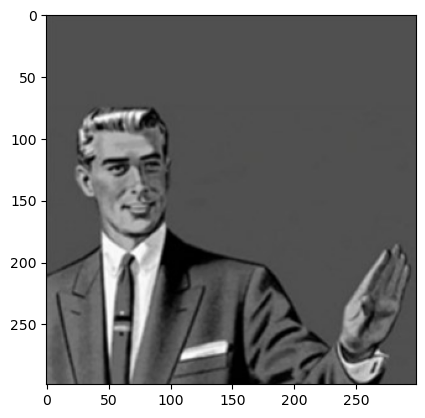

C1: need my ke sep on the way shut the fuck up
C2: thomas hooah sep shut up
C3: batman where is marin sep everywhere bitch
C4: robin am going to sep batman indeed you are
C5: you live next to the beach sep we know
TRA: what do you re going to the world <newline> but when you


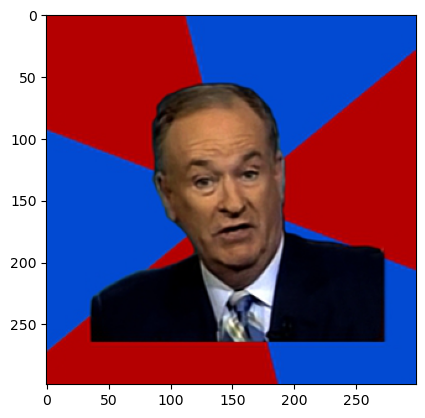

C1: christopher carl sep just fkn propose
C2: use last ball on wild abra sep next one is shiny
C3: nooooooooo sep ooooooooo
C4: why the fu sep did <unk>
C5: elo sep game with crunchy elo
TRA: hey girl <newline> <unk>


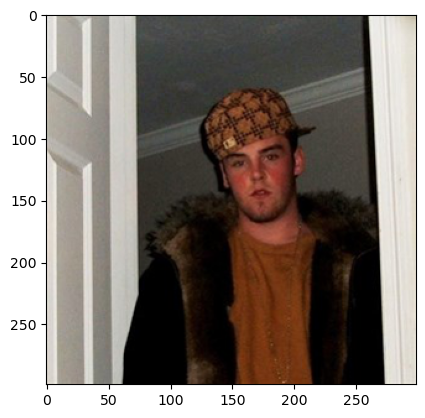

C1: the future sep is already here every second of the day
C2: what if the big bang sep was another universe exploding
C3: what if life isn fair sep and every year million people suicide
C4: what if sep did just jizz in my pants
C5: what if the people behind sep are gingers who take our souls so they can have theirs
TRA: you re switching to go to get unclear to the cat <newline> no


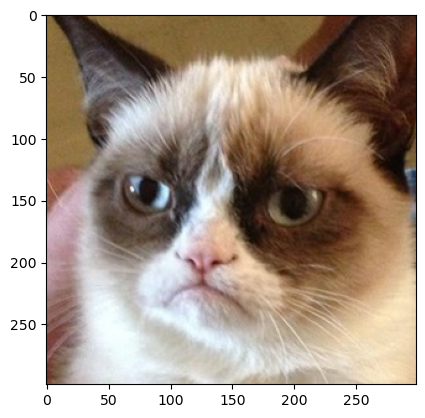

C1: yeah if pop and rap artist could stop making sep music that be great
C2: yeah if adobe would update weekly sep that be great
C3: if you just can stopp to tell people that you re producer sep that would be great
C4: if you could just stop being fucktard sep that would be great
C5: if more men and not students started asking me out sep that would be great
TRA: hey girl <newline> you


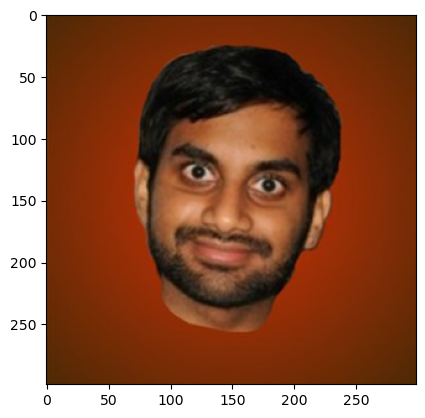

C1: give me the ball sep damnit
C2: hide my guitar again sep dare you double dare you <unk>
C3: do another repost dare you sep double dare you motherfucker
C4: call me waller again sep dare double dare
C5: send me wedding snapchat again sep dare you double dare you
TRA: <unk> <newline>


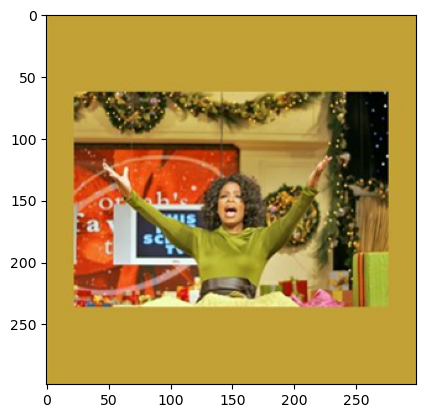

In [17]:
temperature = 0.05
indices = np.random.choice(np.array(list(range(0, 6000, 100))), 10, replace=False)
for i in indices:
    curr_image_feat = test_img_feats[i]
    curr_image      = test_images[i]
    for j in range(5):  ## Display all of the captions trained on
        words = [idx2word[x] for x in train_captions[i+j][:-1] if idx2word[x] not in ('<pad>', '<start>', '<end>')]
        print(f'C{j+1}:', ' '.join(words))
    print('TRA:', gen_caption_temperature(tra_imcap, curr_image_feat, word2idx, word2idx['<pad>'], temperature, args.window_size))
    plt.imshow(curr_image)
    plt.show()

In [ ]:
temperature = 0.05
indices = np.random.choice(np.array(list(range(0, 6000, 100))), 10, replace=False)
tra_captions = []
for i in indices:
    curr_image_feat = test_img_feats[i]
    tra_caption = gen_caption_temperature(tra_imcap, curr_image_feat, word2idx, word2idx['<pad>'], temperature, args.window_size)
    tra_captions.append(tra_caption)
    #plt.imshow(curr_image)
    #plt.show()
    unfiltered_text, s1 = tra_imcap.get_unfiltered_captions(curr_image_feat, word2idx, word2idx['<pad>'], args.window_size)
    filtered_text, s2 = tra_imcap.get_filtered_captions(curr_image_feat, word2idx, word2idx['<pad>'], args.window_size)
    print("unfiltered:", unfiltered_text, s1)
    print("filtered", filtered_text, s2)

--------------------------------------

In [29]:
import numpy as np
import tensorflow as tf
import pickle
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

task='offensive'
MODEL_OFFENSIVE = f"cardiffnlp/twitter-roberta-base-{task}"
tokenizer = AutoTokenizer.from_pretrained(MODEL_OFFENSIVE)

In [30]:
def get_offensive_score(text):
    # download label mapping
    task = 'offensive'
    labels=[]
    mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
    with urllib.request.urlopen(mapping_link) as f:
        html = f.read().decode('utf-8').split("\n")
        csvreader = csv.reader(html, delimiter='\t')
    labels = [row[1] for row in csvreader if len(row) > 1]

    # TF
    model = TFAutoModelForSequenceClassification.from_pretrained(MODEL_OFFENSIVE)
    model.save_pretrained(MODEL_OFFENSIVE)

    encoded_input = tokenizer(text, return_tensors='tf')
    output = model(encoded_input)
    scores = output[0][0].numpy()
    scores = softmax(scores)

    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    for i in range(scores.shape[0]):
        l = labels[ranking[i]]
        s = scores[ranking[i]]
    return np.round(float(s), 4)

def get_filtered_captions(model, image_embedding, wordToIds, padID, window_length):
    """
    Function used to generate a caption using an ImageCaptionModel given
    an image embedding.
    """
    temp = 0.05
    while temp < 0.2:
        idsToWords = {id: word for word, id in wordToIds.items()}
        unk_token = wordToIds['<unk>']
        caption_so_far = [wordToIds['<start>']]
        while len(caption_so_far) < window_length and caption_so_far[-1] != wordToIds['<end>']:
            caption_input = np.array([caption_so_far + ((window_length - len(caption_so_far)) * [padID])])
            logits = model(np.expand_dims(image_embedding, 0), caption_input)
            logits = logits[0][len(caption_so_far) - 1]
            probs = tf.nn.softmax(logits / temp).numpy()
            next_token = unk_token
            attempts = 0
            while next_token == unk_token and attempts < 5:
                next_token = np.random.choice(len(probs), p=probs)
                attempts += 1
            caption_so_far.append(next_token)
        out = []
        for x in caption_so_far:
          word = idsToWords[x]
          if word == "sep":
            word = "<newline>"
          elif word == "emp":
            continue
          out.append(word)
        text = ' '.join(out[1:-1])
        # text = ' '.join([idsToWords[x] for x in caption_so_far][1:-1])
        offensive_score = get_offensive_score(text)
        print("!!!", text, offensive_score)
        if offensive_score > 0.5:
            temp = temp + 0.05
        else:
            return text, offensive_score
    return text, offensive_score

def get_unfiltered_captions(model, image_embedding, wordToIds, padID, window_length):
    """
    Function used to generate a caption using an ImageCaptionModel given
    an image embedding.
    """
    temp = 0.05
    idsToWords = {id: word for word, id in wordToIds.items()}
    unk_token = wordToIds['<unk>']
    caption_so_far = [wordToIds['<start>']]
    while len(caption_so_far) < window_length and caption_so_far[-1] != wordToIds['<end>']:
        caption_input = np.array([caption_so_far + ((window_length - len(caption_so_far)) * [padID])])
        logits = model(np.expand_dims(image_embedding, 0), caption_input)
        logits = logits[0][len(caption_so_far) - 1]
        probs = tf.nn.softmax(logits / temp).numpy()
        next_token = unk_token
        attempts = 0
        while next_token == unk_token and attempts < 5:
            next_token = np.random.choice(len(probs), p=probs)
            attempts += 1
        caption_so_far.append(next_token)
    out = []
    for x in caption_so_far:
      word = idsToWords[x]
      if word == "sep":
        word = "<newline>"
      elif word == "emp":
        continue
      out.append(word)
    text = ' '.join(out[1:-1])
    # text = ' '.join([idsToWords[x] for x in caption_so_far][1:-1])
    offensive_score = get_offensive_score(text)
    return text, offensive_score

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! chuck norris <newline> chuck norris 0.1694


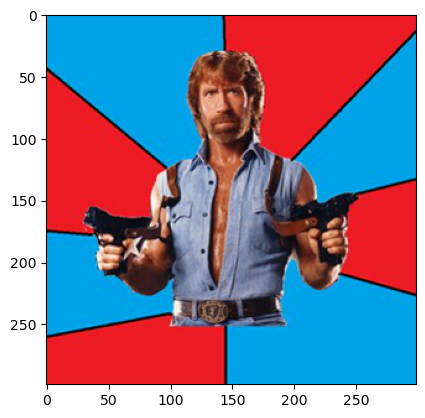

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! <unk> <newline> 0.1303


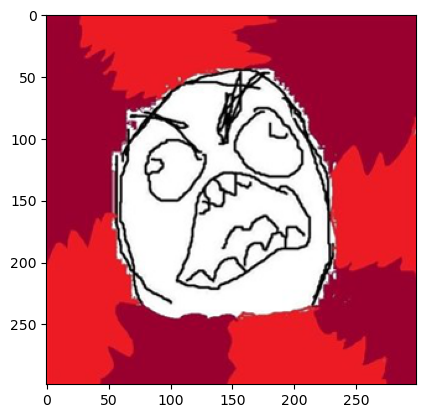

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! copies meme montage <newline> <unk> 0.1384


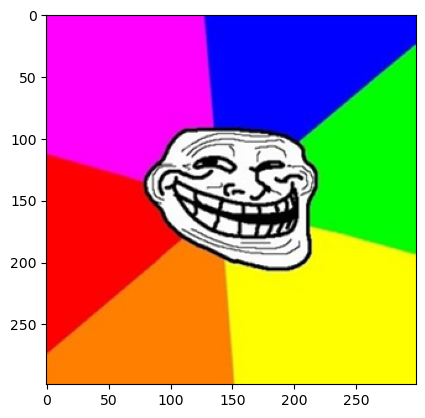

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! so then said <newline> we ll have visas to warhorse academy 0.1181


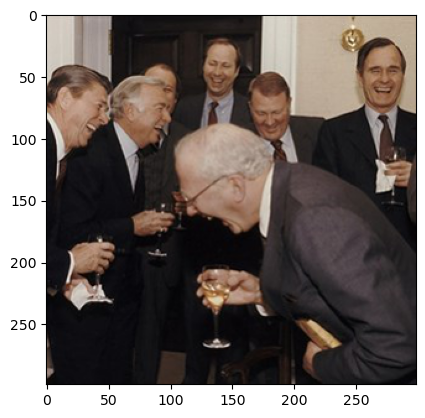

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! <unk> <newline> 0.1303


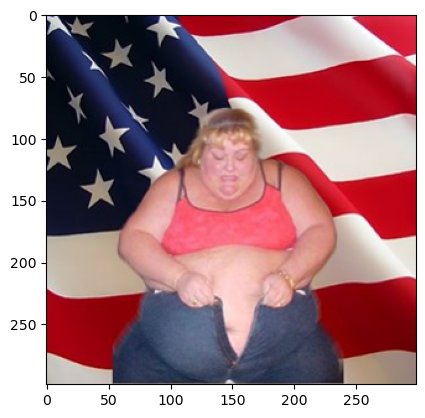

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! so you re telling me <newline> you re telling me 0.0802


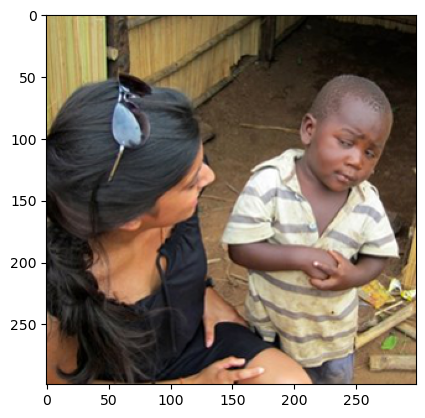

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! gets girlfriend <newline> gets laid 0.2546


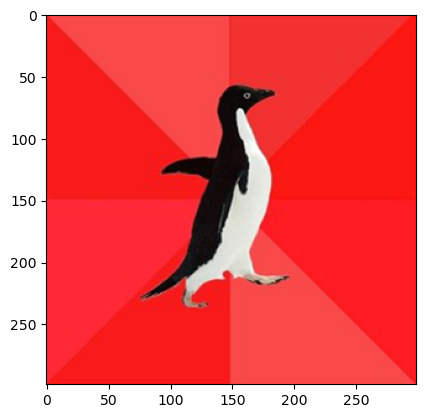

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! ll make my own <unk> <newline> with blackjack and hookers 0.3447


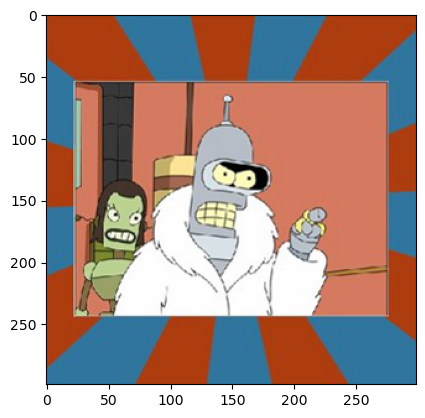

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! you can do is <newline> best can do is 0.0596


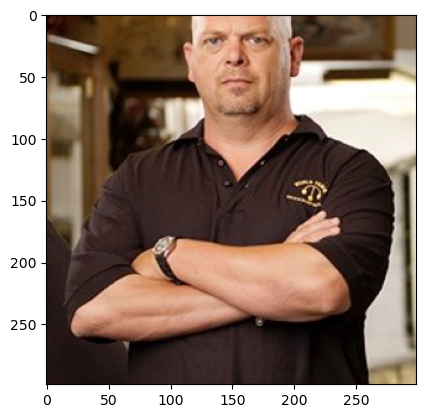

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! you re fired <newline> you re fired 0.1897


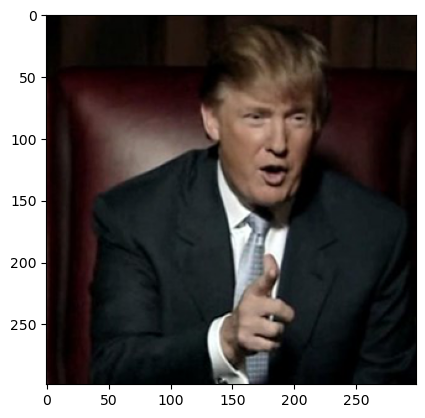

In [35]:
temperature = 0.05
indices = np.random.choice(np.array(list(range(0, 24000, 100))), 10, replace=False)
tra_captions = []
for i in indices:
    curr_image_feat = train_img_feats[i]
    curr_image = train_images[i]
    tra_caption = gen_caption_temperature(tra_imcap, curr_image_feat, word2idx, word2idx['<pad>'], temperature, args.window_size)
    tra_captions.append(tra_caption)
    # unfiltered_text, s1 = get_unfiltered_captions(tra_imcap, curr_image_feat, word2idx, word2idx['<pad>'], args.window_size)
    filtered_text, s2 = get_filtered_captions(tra_imcap, curr_image_feat, word2idx, word2idx['<pad>'], args.window_size)
    # print("unfiltered:", unfiltered_text, s1)
    # print("filtered", filtered_text, s2)
    plt.imshow(curr_image)
    plt.show()

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! <unk> <newline> 0.1303


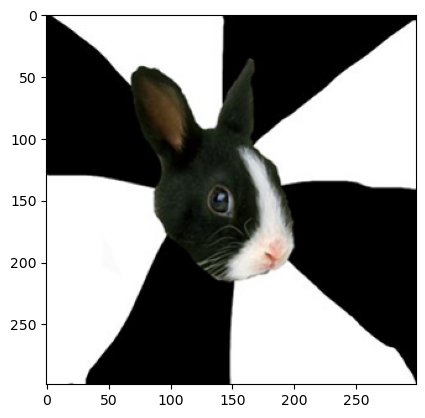

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! hey girl <newline> you 0.1156


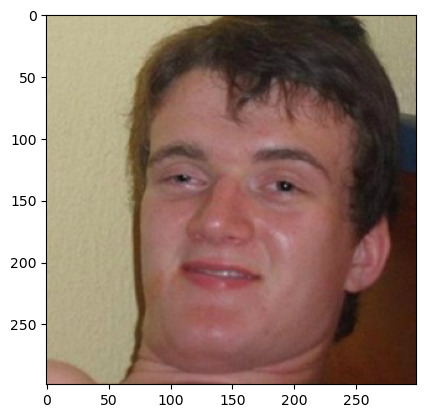

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! can haz <newline> <unk> 0.1071


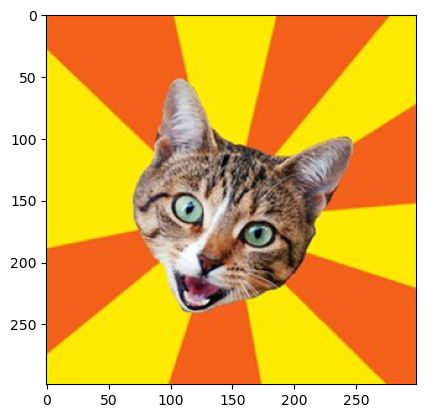

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! guess who <newline> but when you 0.1258


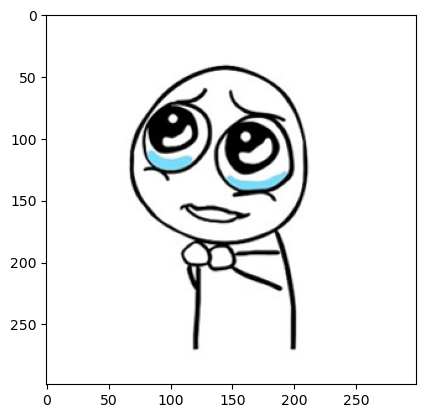

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! you re going to go to the world <newline> but you 0.0868


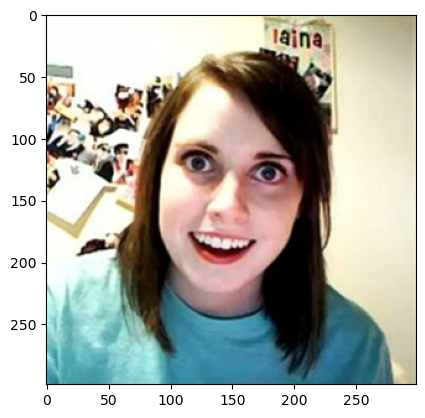

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! what if you <newline> but when you 0.0808


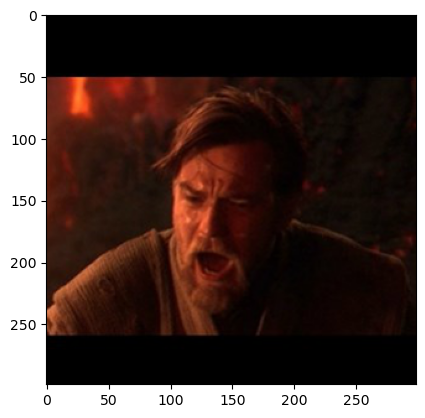

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! you re going to go to the world <newline> you re gonna have no 0.1149


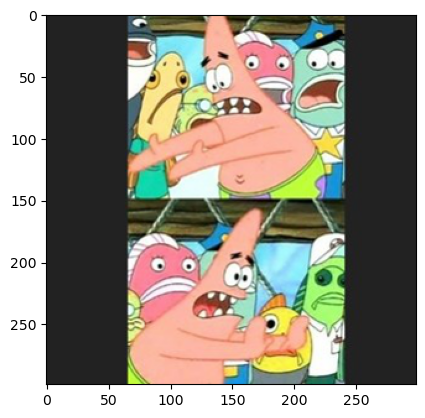

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! the world <newline> does not going to go to go to go to go to go to go 0.1078


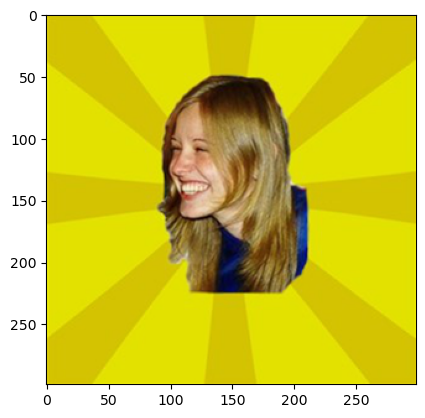

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! <unk> <newline> 0.1303


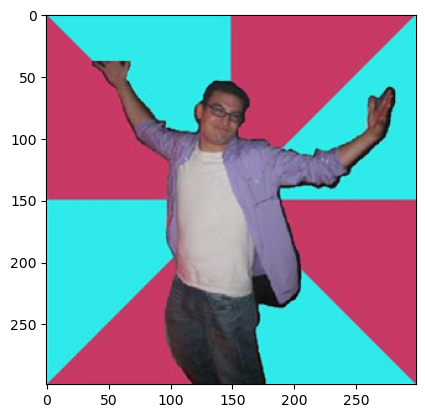

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-offensive.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


!!! why the world <newline> does not 0.1234


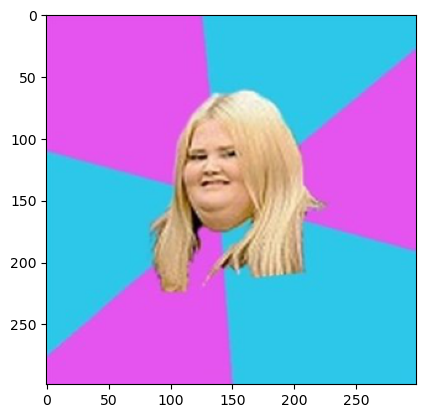

In [33]:
temperature = 0.05
indices = np.random.choice(np.array(list(range(0, 6000, 100))), 10, replace=False)
tra_captions = []
for i in indices:
    curr_image_feat = test_img_feats[i]
    curr_image = test_images[i]
    tra_caption = gen_caption_temperature(tra_imcap, curr_image_feat, word2idx, word2idx['<pad>'], temperature, args.window_size)
    tra_captions.append(tra_caption)
    # unfiltered_text, s1 = get_unfiltered_captions(tra_imcap, curr_image_feat, word2idx, word2idx['<pad>'], args.window_size)
    filtered_text, s2 = get_filtered_captions(tra_imcap, curr_image_feat, word2idx, word2idx['<pad>'], args.window_size)
    # print("unfiltered:", unfiltered_text, s1)
    # print("filtered", filtered_text, s2)
    plt.imshow(curr_image)
    plt.show()